### Introduction
Natural Language Processing (NLP): The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more

Sentiment Analysis: It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.

In this notebook, we'll develop a Sentiment Analysis model to categorize a tweet as Positive or Negative.

Table of Contents
Importing dependencies
Importing dataset
Preprocessing Text
Analysing data
Splitting data
TF-IDF Vectoriser
Transforming Dataset
Creating and Evaluating Models
BernoulliNB Model
LinearSVC Model
Logistic Regression Model
Saving the Models
Using the Model

### Importing Dependencies

In [1]:
import re
import os
import numpy as np
import pandas as pd
import string
import random
import warnings
warnings.filterwarnings("ignore")
from collections import Counter


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
from spacy.util import compounding
from spacy.util import minibatch


# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words = stopwords.words('english')


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Tensorflow and Keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences





## Importing Dataset

The dataset being used is the sentiment140 which is publically available at Kaggle and is open-source. It is publiashed for the research purpose and used for different Kaggle competitions. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.

It contains the following 6 fields:

sentiment: the polarity of the tweet (0 = negative, 4 = positive)
ids: The id of the tweet (2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user that tweeted (robotickilldozr)
text: the text of the tweet (Lyx is cool)
We require only the sentiment and text fields, so we discard the rest.

Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)

In [2]:


data= pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
data.columns = ["label", "time", "date", "query", "username", "text"]

Five top records of data

In [3]:
data.head()

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Five last rows of the dataset

In [4]:
data.tail()

,label,time,date,query,username,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


Columns/features in the data

In [5]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

Length of the data

In [6]:
print("Length of the dataset is" , len(data))

Length of the dataset is 1600000


Shape of the data 

In [7]:
data.shape

(1600000, 6)

Data Information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   time      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Data types of all the columns

In [9]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

Checking Null values

In [10]:
np.sum(data.isnull().any(axis=1))

0

Rows and columns in the dataset

In [11]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns. Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)

In [12]:
data = data.sample(frac=1).reset_index(drop=True)


In [13]:
data = data.drop(['time', 'date', 'query', 'username'], axis=1)


## Preprocessing words

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are removed.
3. Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
4. Removing Usernames: Removing @Usernames with word "USER". (eg: "@Kaggle" to "USER")
5. Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
6. Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
7. Removing Short Words: Words with length less than 2 are removed.
8. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
9. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

Here are decoding the labels. We map 0 -> Negative and 1 -> Positive as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution.

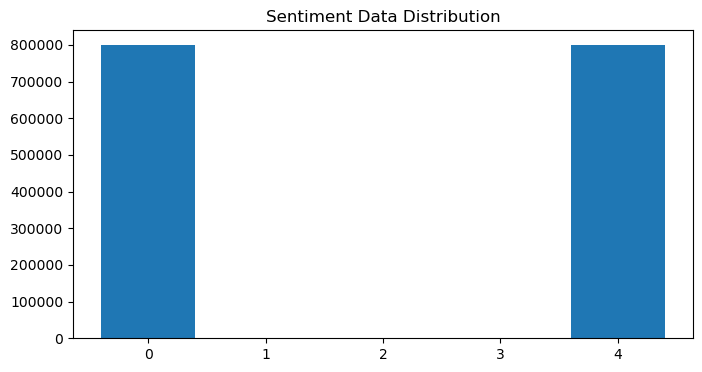

In [14]:
data = data.sample(frac=1).reset_index(drop=True)
val_count = data.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
plt.show()

We can clearly see that the dataset is free from any skewness.Hence, we don't need to perform any imbalancing techniques.

In [15]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [16]:
# Defining the various patterns

urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z0-9]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"



In [17]:
def preprocess(textdata):
   
    # Create Lemmatizer and Stemmer.
    stemmer = SnowballStemmer('english')
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
        
    # Replace all URls with 'URL'
    textdata = re.sub(urlPattern,' ',str(textdata).lower()).strip()
    # Replace all emojis.
    for emoji in emojis.keys():
        textdata = textdata.replace(emoji, "EMOJI" + emojis[emoji])        
    # Replace @USERNAME to 'USER'.
    textdata = re.sub(userPattern,"", str(textdata).lower()).strip()
    # Replace all non alphabets.
    textdata = re.sub(alphaPattern, " ", str(textdata).lower()).strip()
    # Replace 3 or more consecutive letters by 2 letter.
    textdata = re.sub(sequencePattern, seqReplacePattern, str(textdata).lower()).strip()
    
    processedText = []
    for token in textdata.split():
        if token not in stop_words:
            processedText.append(stemmer.stem(token))
        
    return " ".join(processedText)
    


In [18]:
#Creating a new column named cleaned_text for the processed words
data = data.sample(frac=1).reset_index(drop=True)
data = data[:600000]




In [19]:
data['cleaned_text'] = data['text'].apply(lambda x: preprocess(x))

In [20]:
TRAIN_SIZE = 0.95
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [21]:
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 569999
Test Data size 30001


In [22]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 341321


In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (569999, 30)
Testing X Shape: (30001, 30)


In [24]:
labels = train_data.label.unique().tolist()

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (569999, 1)
y_test shape: (30001, 1)


In [26]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-04-02 14:17:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-02 14:17:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-02 14:17:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [28]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [29]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [30]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [31]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [32]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [35]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [36]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
557/557 [==============================] - 326s 571ms/step - loss: 0.5130 - accuracy: 0.7439 - val_loss: 0.4574 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 2/10
557/557 [==============================] - 320s 574ms/step - loss: 0.4637 - accuracy: 0.7782 - val_loss: 0.4424 - val_accuracy: 0.7937 - lr: 0.0010
Epoch 3/10
557/557 [==============================] - 318s 572ms/step - loss: 0.4474 - accuracy: 0.7894 - val_loss: 0.4337 - val_accuracy: 0.7967 - lr: 0.0010
Epoch 4/10
557/557 [==============================] - 317s 569ms/step - loss: 0.4366 - accuracy: 0.7954 - val_loss: 0.4275 - val_accuracy: 0.8006 - lr: 0.0010
Epoch 5/10
557/557 [==============================] - 318s 571ms/step - loss: 0.4291 - accuracy: 0.8000 - val_loss: 0.4274 - val_accuracy: 0.7993 - lr: 0.0010
Epoch 6/10
557/557 [==============================] - 317s 568ms/step - loss: 0.4237 - accuracy: 0.8035 - val_loss: 0.4242 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 7/10
557/557 [==========================

In [49]:

def print_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate accuracy, sensitivity, specificity, and F1 score
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    f1 = f1_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("F1 Score:", f1)

    # Calculate ROC score
    roc_score = roc_auc_score(y_true, y_pred)
    print("ROC Score:", roc_score)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [50]:
def print_train_metrics(model, X_train, y_train):
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    y_train_pred_bin = np.round(y_train_pred).flatten()  # convert to binary predictions
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_train, y_train_pred_bin)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate accuracy, sensitivity, specificity, and F1 score
    accuracy = accuracy_score(y_train, y_train_pred_bin)
    sensitivity = recall_score(y_train, y_train_pred_bin)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    f1 = f1_score(y_train, y_train_pred_bin)
    print("Accuracy:", accuracy)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("F1 Score:", f1)

    # Calculate ROC score
    roc_score = roc_auc_score(y_train, y_train_pred)
    print("ROC Score:", roc_score)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    plt.plot(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [51]:
def decode_sentiment(score):
    return 1 if score>0.5 else 0


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

4/4 [==============================] - 4s 935ms/step


17813/17813 [==============================] - 209s 12ms/step
Confusion Matrix:
[[238568  46433]
 [ 49738 235260]]
Accuracy: 0.831278651366055
Sensitivity: 0.8254794770489617
Specificity: 0.8370777646394223
F1 Score: 0.8302937579739224
ROC Score: 0.9137979218434634


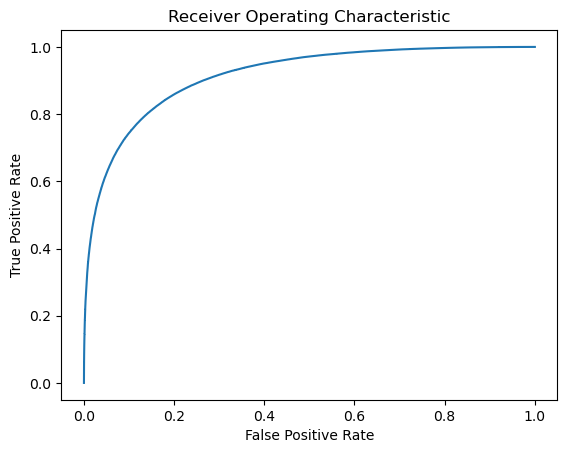

In [52]:
print_train_metrics(model, x_train, y_train)


Confusion Matrix:
[[12227  2818]
 [ 2935 12021]]
Accuracy: 0.8082397253424886
Sensitivity: 0.8037576892217171
Specificity: 0.8126952475905617
F1 Score: 0.806913911730156
ROC Score: 0.8082264684061393


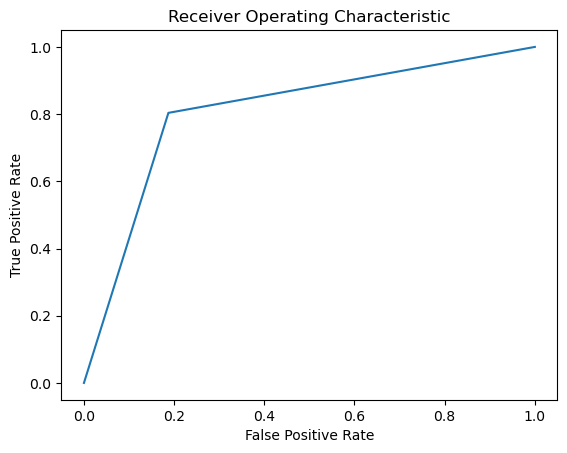

In [53]:
print_metrics(y_test,y_pred_1d)

In [60]:
from sklearn.metrics import classification_report

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [48]:
y_pred_1d

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
